## $$\text{Máquina de Soporte Vectorial}$$

<div style="display: flex; justify-content:center">
    <img  src="../img/svm_classifier.jpeg">
</div>

### Importamos el data set

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

df = pd.read_csv('../data/Social_Network_Ads.csv')
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

### Dividimos y escalamos

In [3]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)

### Ajustamos el modelo

In [5]:
from sklearn.svm import SVC

classifier = SVC(kernel="linear", random_state=0)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

### Predecimos

In [6]:
y_pred = classifier.predict(X_test)

### Matriz de confusión

In [7]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test,y_pred)
cm

array([[66,  2],
       [ 8, 24]])

### Representación gráfica con kernel lineal

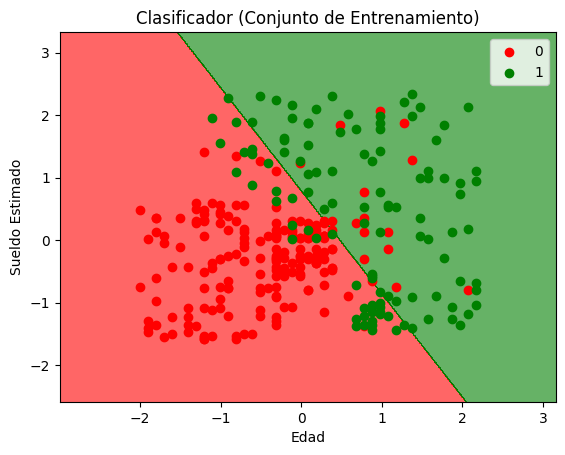

In [10]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green'))(i)).reshape(1,-1), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

## $$\text{Transformando a dimensiones superiores}$$
<div style="display: flex; gap:10px">
    <img style="width: 45%" src="../img/svm_dimsuperior.jpeg">
    <img style="width: 45%" src="../img/svm_dimproyect.jpeg">
</div>

Al tranformar a una dimensión superior, podemos trazar un hiperplano que pueda dividir las variables y tratarlo como si de un problema `linealmente separables` se tratara. Sin embargo esto tiene un costo computacional y hay que saber cuando usar esta técnica.

$$\text{`Transformar una variable a un espacio de dimensión superior puede ser muy costoso computacionalmente`}$$

### Truco del Kernel

#### El kernel Gaussiano "RBF"
$$ m = -{\frac {||x - l^{i}||^2}{2\cdot \sigma ^{2}}}$$
$$ K(\vec{x},\vec{l}^i)=e^{m}$$

<div style="display: flex; justify-content:center">
    <img width="70%" src="../img/gaussiano.jpeg">
</div>

Nota: `ver otro tipo de kernels: sigmoide, polinómico, ...`

### Ajustamos el modelo

In [5]:
from sklearn.svm import SVC

classifier = SVC(kernel="rbf", random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

### Predecimos

In [6]:
y_pred = classifier.predict(X_test)

### Matriz de confusión

In [7]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 3, 29]])

### Representación gráfica con kernel gaussiano

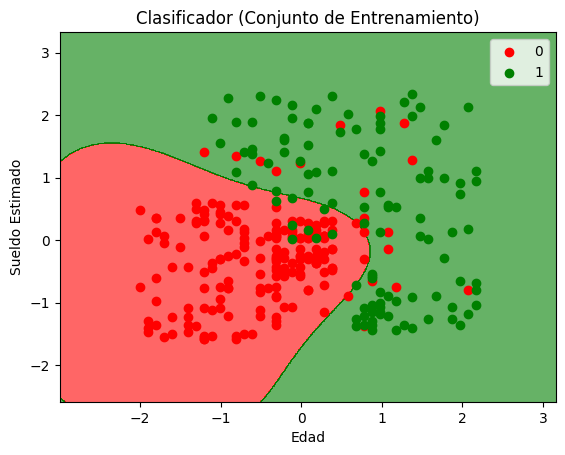

In [8]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green'))(i)).reshape(1,-1), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()